In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize

In [2]:
%load_ext blackcellmagic

In [ ]:
#%%writefile orthogonal_regression_implementation.py
##!/usr/bin/env python3
# -*- coding: utf-8 -*-
# ----------------------------------------------------------------------------
# orthogonal_regression_implementation.py
#
# Author: Alexander Paul
# Date: 22 JUL 22
# Class: MEDP 7098
#
# Description:
# This python script provides a basic implementation of orthogonal regression
# on a given data set. The 'fit' function calls the scipy iterative
# minimization algorithm and applies it to the perpendicular distance function.
# ----------------------------------------------------------------------------

from numpy import sqrt, linspace, random
from scipy.optimize import minimize


def fit(x_input, y_input, m_start=0, b_start=0):
    global X_ORTHOG_FIT
    global Y_ORTHOG_FIT
    X_ORTHOG_FIT = x_input
    Y_ORTHOG_FIT = y_input
    starting_parameters = [m_start, b_start]
    result = minimize(PerpendicularResiduals, starting_parameters)
    slope = result.x[0]
    y_intercept = result.x[1]
    print("slope = ", slope, " b = ", y_intercept)
    return [slope, y_intercept]


def PerpendicularResiduals(a):
    m_local = a[0]
    b_local = a[1]
    return sum(
        [
            abs(yi - (b_local + m_local * xi)) / sqrt(1 + (m_local ** 2))
            for xi, yi in zip(X_ORTHOG_FIT, Y_ORTHOG_FIT)
        ]
    )


if __name__ == "__main__":
    # Define the true values of the x and y data
    xtrue = linspace(0, 100)
    x = xtrue
    ytrue = [0.6 * xi for xi in xtrue]

    # Add noise to y-values.
    noise_stddev = 5
    noise = random.normal(0, noise_stddev, len(ytrue))
    y = ytrue + noise

    answer = fit(x, y)

    # y = [0.6*xi+20*random.randint(-1,1)*random.random() for xi in x]

    print("Results:\n\t m = ", answer[0], "\n\t b = ", answer[1])

In [ ]:
%run orthogonal_regression_implementation.py

slope =  0.5999999837626864  b =  8.207216727793514e-07


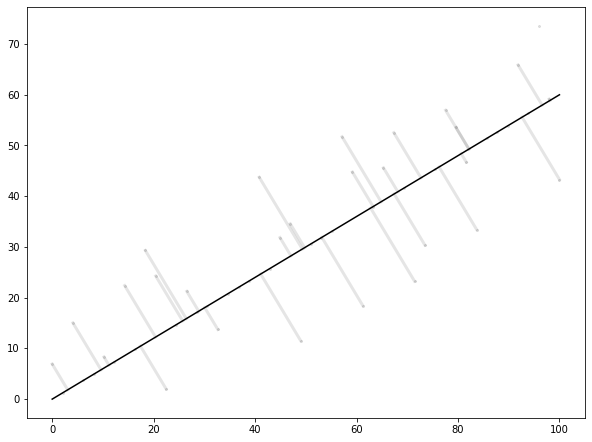

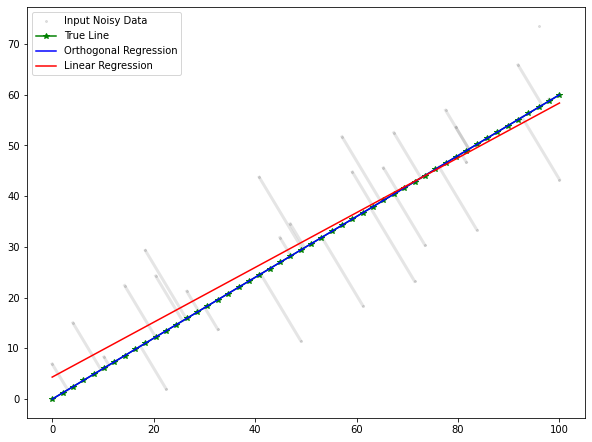

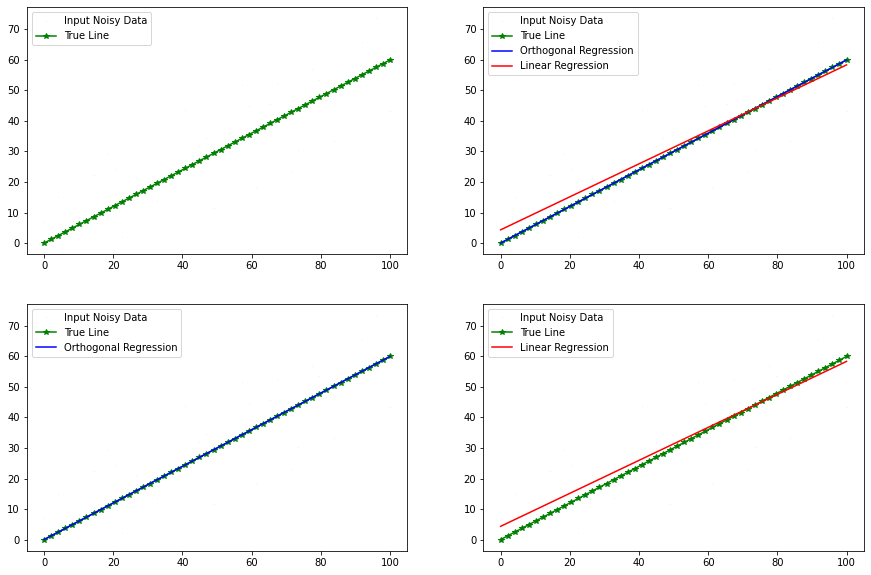

In [22]:
#%%writefile orthogonal_regression_demonstration.py
##!/usr/bin/env python3
# -*- coding: utf-8 -*-
# ----------------------------------------------------------------------------
# orthogonal_regression_demonstration.py
#
# Author: Alexander Paul
# Date: 22 JUL 22
# Class: MEDP 7098
#
# Description:
# This python script demonstrates the usage of the orthogonal regression 
# implementaton and generates a number of plots.
# ----------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import random
from orthogonal_regression_implementation import fit

# Define input data:
xtrue = np.linspace(0, 100)
ytrue = [0.6 * xi for xi in xtrue]
# Add noise to y-values. Using a standard deviation of +/- 5 to introduce random noise in the data.
x = xtrue
y = [0.6 * xi + 20 * random.randint(-1, 1) * random.random() for xi in x]
# y = [0.6 * xi + np.random.normal(0, 50) for xi in x]

# Compute statistics
xbar = sum(x) / len(x)
ybar = sum(y) / len(y)
sxx = sum([(xi - xbar) ** 2 for xi in x]) / len(x)
sxy = sum([(xi - xbar) * (yi - ybar) for xi, yi in zip(x, y)]) / len(x)
syy = sum([(yi - ybar) ** 2 for yi in y]) / len(y)

# Apply regular linear regression
m_linear = sum([(xi - xbar) * (yi - ybar) for xi, yi in zip(x, y)]) / sum(
    [((xi - xbar) ** 2) for xi in x]
)
b_linear = ybar - m_linear * xbar
ylin = [m_linear * xi + b_linear for xi in x]

# Apply orthogonal regression
[slope, b_orthog] = fit(x, y)
y_orthog = [slope * xi + b_orthog for xi in x]

# Make plots
x_perp_visualization = []
y_perp_visualization = []
for xvisual, yvisual in zip(x, y):
    perp_a1 = -slope
    perp_c1 = -b_orthog
    perp_a2 = -1 / perp_a1
    perp_c2 = -((xvisual / slope) + yvisual)
    # Compute intersection locations
    x_intersect = (perp_c2 - perp_c1) / (perp_a1 - perp_a2)
    y_intersect = (perp_c1 * perp_a2 - perp_c2 * perp_a1) / (perp_a1 - perp_a2)
    x_lower_bound = min(xvisual, x_intersect)
    x_upper_bound = max(xvisual, x_intersect)
    if x_lower_bound < min(x) or x_upper_bound > max(x):
        continue
    x_to_plot = np.linspace(x_lower_bound, x_upper_bound)
    y_to_plot = [(-perp_a2 * xi - perp_c2) for xi in x_to_plot]
    x_perp_visualization.append(x_to_plot)
    y_perp_visualization.append(y_to_plot)

figperp = plt.figure(figsize=(10, 10))
ax = figperp.add_subplot(1, 1, 1)
plt.plot(x, y_orthog, "-k")
plt.plot(x, y, "ok", alpha=0.1, ms=2)
for index in range(len(y_perp_visualization)):
    plt.plot(
        x_perp_visualization[index], y_perp_visualization[index], "-k", alpha=0.1, lw=3
    )
ax.set_aspect("equal", adjustable="box")
figperp.savefig("demo.png")


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for index in range(len(y_perp_visualization)):
    plt.plot(
        x_perp_visualization[index], y_perp_visualization[index], "-k", alpha=0.1, lw=3
    )
plt.plot(x, y, "ok", label="Input Noisy Data", alpha=0.1, ms=2)
plt.plot(xtrue, ytrue, "-*g", label="True Line")
plt.plot(x, y_orthog, "-b", label="Orthogonal Regression")
plt.plot(x, ylin, "-r", label="Linear Regression")

plt.legend()
ax.set_aspect("equal", adjustable="box")
fig.savefig("regressions.png")

seperate_fig = plt.figure(figsize=(15, 10))
seperate_fig.add_subplot(2, 2, 1)
plt.plot(x, y, "ok", label="Input Noisy Data", alpha=0.1, ms=0.2)
plt.plot(xtrue, ytrue, "-*g", label="True Line")
plt.legend()
seperate_fig.add_subplot(2, 2, 2)
plt.plot(x, y, "ok", label="Input Noisy Data", alpha=0.1, ms=0.2)
plt.plot(xtrue, ytrue, "-*g", label="True Line")
plt.plot(x, y_orthog, "-b", label="Orthogonal Regression")
plt.plot(x, ylin, "-r", label="Linear Regression")
plt.legend()
seperate_fig.add_subplot(2, 2, 3)
plt.plot(x, y, "ok", label="Input Noisy Data", alpha=0.1, ms=0.2)
plt.plot(xtrue, ytrue, "-*g", label="True Line")
plt.plot(x, y_orthog, "-b", label="Orthogonal Regression")
plt.legend()
seperate_fig.add_subplot(2, 2, 4)
plt.plot(x, y, "ok", label="Input Noisy Data", alpha=0.1, ms=0.2)
plt.plot(xtrue, ytrue, "-*g", label="True Line")
plt.plot(x, ylin, "-r", label="Linear Regression")
plt.legend()
seperate_fig.savefig("seperate_subplots.png")

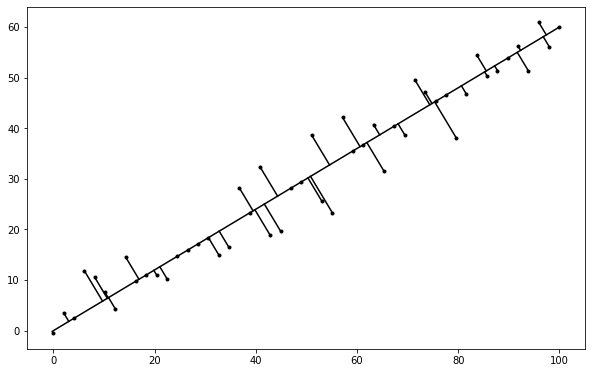

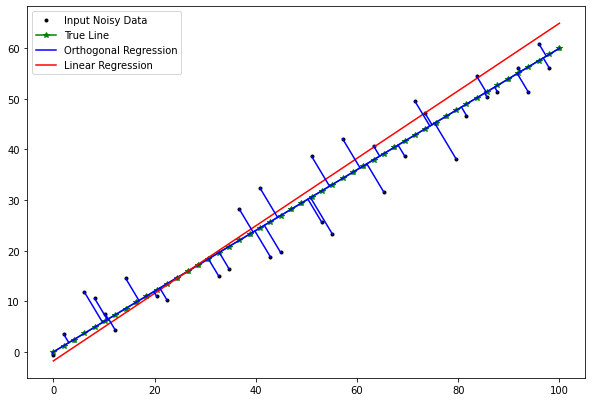

In [20]:
%run orthogonal_regression.py